## Dimensionality Reduction

### Introduction

* If your raw data set has thousands of features, where do you start?
* You can't analyze all of the features one by one
* Even if you want to automate the one-by-one feature analysis, you will need a very powerful computer or cluster and/or long time
* Reduce the number of features in a dataset without having to lose much information and keep (or improve) the model's performance
* Similar to picture or video compression where we reduce the information size without losing much information. In some cases, human eyes couldn't tell the difference.

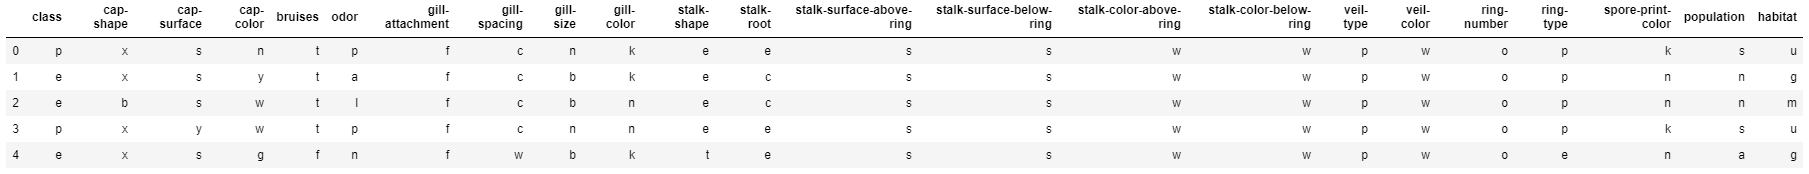

#### The Curse of Dimensionality

* To start a ML project, we tend to add as many features as possible at the beginning, to get a better model.
* However at some point, the performance of the model will decrease with the increasing number of elements.

#### Why does this happen?

* Sample density decreases exponentially with the increase of the dimensionality
* The dimensionality of the feature space grows and becomes sparser
* Machine learning models tend to overfit sparse data.

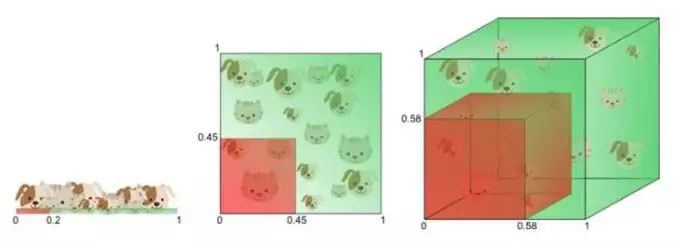


* Euclidean distance is usually not good for sparse data
    * The key issue here is that the Euclidean norm gives the same importance to any direction.
    * In high dimensional space, sparse data usually has a lot of features with NA values, i.e., data start to spread out away from the center. The sparse data tends to stay on the edges or sides in the high dimensional space.
    * It makes Euclidean distance not the appropriate metric any more
    
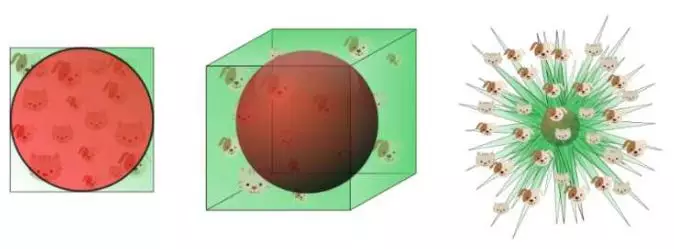

#### Dimensionality reduction techniques may help

* Data explosion in the last 10 years.
    * Facebook collects data of what you like, share, post, places you visit, restaurants you like, etc.
    * Your smartphone apps collect a lot of personal information about you
    * Amazon collects data of what you buy, view, click, etc. on their site
    * Google collects data about everything you did online.
    * One data point may have thousands of features.
* Computational power and big data technology still couldn't catch up the speed of data explosion.
* Business insight from huge mount of data becomes challenging.
* How would machine learning algorithms handle thounsands of features?
* How to visualize thousands of dimensions?

#### Why do we need dimensionality reduction in machine learning?

* Space required to store the data is reduced as the number of dimensions comes down
* Less dimensions lead to less computation/training time
* Some algorithms do not perform well when we have a large dimensions. So reducing these dimensions needs to happen for the algorithm to be useful
* It takes care of multicollinearity by removing redundant features. For example, you have two variables – ‘time spent on treadmill in minutes’ and ‘calories burnt’. These variables are highly correlated as the more time you spend running on a treadmill, the more calories you will burn. Hence, there is no point in storing both as just one of them does what you require

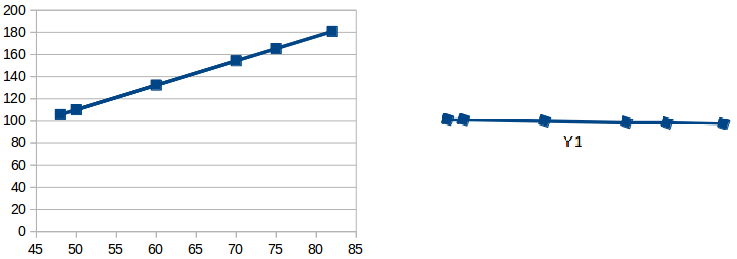

* It helps in visualizing data. As discussed earlier, it is very difficult to visualize data in higher dimensions so reducing our space to 2D or 3D may allow us to plot and observe patterns more clearly

### Start with a few simple techniques

### 1. Variance check

* If a feature in our dataset has all the observations with same value, would it be a good feature?
    * Since this feature has zero variance, it won't make any difference in prediction.

#### So we can calculate the variance of each feature, then filter those with low variance.

In [1]:
# import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# read the data
train=pd.read_csv("train.csv")

#### impute the missing values in the Item_Weight column using the median value of the known Item_Weight observations

In [3]:
train['Item_Weight']

0        9.300
1        5.920
2       17.500
3       19.200
4        8.930
         ...  
8518     6.865
8519     8.380
8520    10.600
8521     7.210
8522    14.800
Name: Item_Weight, Length: 8523, dtype: float64

In [4]:
train['Item_Weight'].fillna(train['Item_Weight'].median(), inplace=True)
train['Item_Weight']

0        9.300
1        5.920
2       17.500
3       19.200
4        8.930
         ...  
8518     6.865
8519     8.380
8520    10.600
8521     7.210
8522    14.800
Name: Item_Weight, Length: 8523, dtype: float64

#### Use the mode of the known Outlet_Size values to impute the missing values

In [5]:
train['Outlet_Size']

0       Medium
1       Medium
2       Medium
3          NaN
4         High
         ...  
8518      High
8519       NaN
8520     Small
8521    Medium
8522     Small
Name: Outlet_Size, Length: 8523, dtype: object

In [6]:
# use the mode of the known Outlet_Size values to impute the missing values
train['Outlet_Size'].fillna(train['Outlet_Size'].mode()[0], inplace=True)
train['Outlet_Size']

0       Medium
1       Medium
2       Medium
3       Medium
4         High
         ...  
8518      High
8519    Medium
8520     Small
8521    Medium
8522     Small
Name: Outlet_Size, Length: 8523, dtype: object

#### check whether all the missing values have been filled

In [7]:
train.isnull().sum()/len(train)*100

Item_Identifier              0.0
Item_Weight                  0.0
Item_Fat_Content             0.0
Item_Visibility              0.0
Item_Type                    0.0
Item_MRP                     0.0
Outlet_Identifier            0.0
Outlet_Establishment_Year    0.0
Outlet_Size                  0.0
Outlet_Location_Type         0.0
Outlet_Type                  0.0
Item_Outlet_Sales            0.0
dtype: float64

#### calculate the variance of all the numerical features

In [8]:
train.var()

Item_Weight                  1.786956e+01
Item_Visibility              2.662335e-03
Item_MRP                     3.878184e+03
Outlet_Establishment_Year    7.008637e+01
Item_Outlet_Sales            2.912141e+06
dtype: float64

* We found that the variance of <b>Item_Visibility</b> is much less than others.
* Based on our theory, we can drop <b>Item_Visibility</b>

In [9]:
train.drop("Item_Visibility", 1)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,Baking Goods,108.1570,OUT045,2002,Medium,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


### 2. Correlation check

* High correlation between two variables means they have similar information.
* This can bring down the performance of some models drastically (linear and logistic regression models, for instance)
* Compute a correlation matrix
* What correlation value is too high? This is highly subjective and may need domain knowledge. 

In [10]:
df=train.drop('Item_Outlet_Sales', 1) #It is the target column we want to predict
df.corr()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
Item_Weight,1.000000,-0.014168,0.024951,0.007739
Item_Visibility,-0.014168,1.000000,-0.001315,-0.074834
Item_MRP,0.024951,-0.001315,1.000000,0.005020
Outlet_Establishment_Year,0.007739,-0.074834,0.005020,1.000000


#### Now we see the correlations are quite small values.

* Generally, if the correlation between a pair of variables is greater than 0.5-0.6, we should seriously consider dropping one of those variables.
* In this case they all seem ok so we don't drop any features.

### 3. Decision Tree (Random Forest) Feature Importances

* Random Forest can be used for feature selection. 
* It has in-built feature importance.
* <b>Notice: </b> We need to convert the data into numeric form by applying one hot encoding, as Random Forest (Scikit-Learn Implementation) takes only numeric inputs.


#### As we learned, unique ID features usually have the highest information gain but are useless for random 

In [11]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1
...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,Medium,Tier 2,Supermarket Type1
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2


In [12]:
from sklearn.ensemble import RandomForestRegressor
df=df.drop(['Item_Identifier', 'Outlet_Identifier'], axis=1)
df

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,9.300,Low Fat,0.016047,Dairy,249.8092,1999,Medium,Tier 1,Supermarket Type1
1,5.920,Regular,0.019278,Soft Drinks,48.2692,2009,Medium,Tier 3,Supermarket Type2
2,17.500,Low Fat,0.016760,Meat,141.6180,1999,Medium,Tier 1,Supermarket Type1
3,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,1998,Medium,Tier 3,Grocery Store
4,8.930,Low Fat,0.000000,Household,53.8614,1987,High,Tier 3,Supermarket Type1
...,...,...,...,...,...,...,...,...,...
8518,6.865,Low Fat,0.056783,Snack Foods,214.5218,1987,High,Tier 3,Supermarket Type1
8519,8.380,Regular,0.046982,Baking Goods,108.1570,2002,Medium,Tier 2,Supermarket Type1
8520,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,2004,Small,Tier 2,Supermarket Type1
8521,7.210,Regular,0.145221,Snack Foods,103.1332,2009,Medium,Tier 3,Supermarket Type2


In [13]:
model = RandomForestRegressor(random_state=1, max_depth=10)
df=pd.get_dummies(df)
model.fit(df,train.Item_Outlet_Sales)

C:\Users\David Li\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=1, verbose=0,
                      warm_start=False)

#### After fitting the model, plot the feature importance graph:

In [14]:
df.columns.values

array(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Fat_Content_LF',
       'Item_Fat_Content_Low Fat', 'Item_Fat_Content_Regular',
       'Item_Fat_Content_low fat', 'Item_Fat_Content_reg',
       'Item_Type_Baking Goods', 'Item_Type_Breads',
       'Item_Type_Breakfast', 'Item_Type_Canned', 'Item_Type_Dairy',
       'Item_Type_Frozen Foods', 'Item_Type_Fruits and Vegetables',
       'Item_Type_Hard Drinks', 'Item_Type_Health and Hygiene',
       'Item_Type_Household', 'Item_Type_Meat', 'Item_Type_Others',
       'Item_Type_Seafood', 'Item_Type_Snack Foods',
       'Item_Type_Soft Drinks', 'Item_Type_Starchy Foods',
       'Outlet_Size_High', 'Outlet_Size_Medium', 'Outlet_Size_Small',
       'Outlet_Location_Type_Tier 1', 'Outlet_Location_Type_Tier 2',
       'Outlet_Location_Type_Tier 3', 'Outlet_Type_Grocery Store',
       'Outlet_Type_Supermarket Type1', 'Outlet_Type_Supermarket Type2',
       'Outlet_Type_Supermarket Type3'], dtype=object

In [15]:
model.feature_importances_

array([1.81267258e-02, 4.38458389e-02, 5.09237777e-01, 2.96067440e-02,
       1.98511677e-03, 1.89164450e-03, 2.37219602e-03, 9.55680705e-04,
       6.77753923e-04, 2.03053326e-03, 1.35114460e-03, 1.15303709e-03,
       1.60043826e-03, 2.30964347e-03, 2.06573098e-03, 2.66588152e-03,
       1.01183539e-03, 2.46668394e-03, 1.12002714e-03, 1.13691163e-03,
       4.78022288e-04, 9.84512258e-04, 3.10053551e-03, 2.36236064e-03,
       1.16738138e-03, 3.33294845e-04, 9.52997657e-04, 1.26039030e-03,
       8.67095672e-04, 8.85285750e-04, 1.47835642e-03, 2.73878085e-01,
       2.03411059e-03, 9.56488035e-04, 8.16497382e-02])

In [16]:
dict(reversed(sorted(zip(model.feature_importances_, df.columns.values))))

{0.5092377770757585: 'Item_MRP',
 0.27387808545775183: 'Outlet_Type_Grocery Store',
 0.08164973819321124: 'Outlet_Type_Supermarket Type3',
 0.043845838913194615: 'Item_Visibility',
 0.02960674396784694: 'Outlet_Establishment_Year',
 0.01812672583806941: 'Item_Weight',
 0.0031005355149808884: 'Item_Type_Snack Foods',
 0.0026658815215820355: 'Item_Type_Fruits and Vegetables',
 0.002466683940982252: 'Item_Type_Health and Hygiene',
 0.002372196024325761: 'Item_Fat_Content_Regular',
 0.002362360639461133: 'Item_Type_Soft Drinks',
 0.002309643468042909: 'Item_Type_Dairy',
 0.002065730978927152: 'Item_Type_Frozen Foods',
 0.002034110589375729: 'Outlet_Type_Supermarket Type1',
 0.002030533255962631: 'Item_Type_Baking Goods',
 0.001985116772520762: 'Item_Fat_Content_LF',
 0.0018916445047105473: 'Item_Fat_Content_Low Fat',
 0.0016004382608606634: 'Item_Type_Canned',
 0.0014783564194079143: 'Outlet_Location_Type_Tier 3',
 0.0013511445955130372: 'Item_Type_Breads',
 0.00126039030212538: 'Outlet_Si

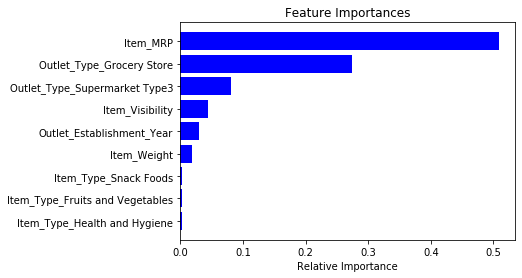

In [17]:
features = df.columns
importances = model.feature_importances_
indices = np.argsort(importances)[-9:]  # top 10 features
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

#### Then we can select the top features based on the feature importances.

### 4. Backward Feature Elimination

* Take all the n variables present in our dataset and train the model using them
* Evaluate the model
* Now we drop one variable every time and train the model on the remaining n-1 variables
* Evaluate the n models
* Pick the best model from the n models
* Identify the variable that was dropped to get the above best model
* Repeat this process until no variable can be dropped

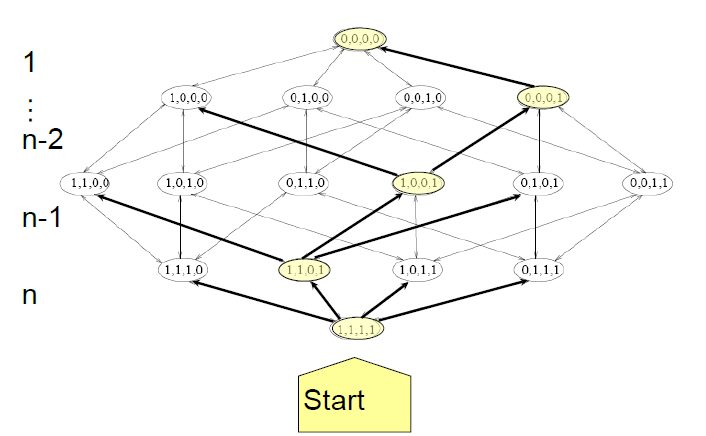

### 5. Forward Feature Selection

* Start with a single feature. Essentially, we train the model n number of times using each feature separately
* The variable giving the best performance is selected as the starting variable
* Then we repeat this process and add one variable at a time. The variable that produces the highest increase in performance is retained
* We repeat this process until no significant improvement is seen in the model’s performance

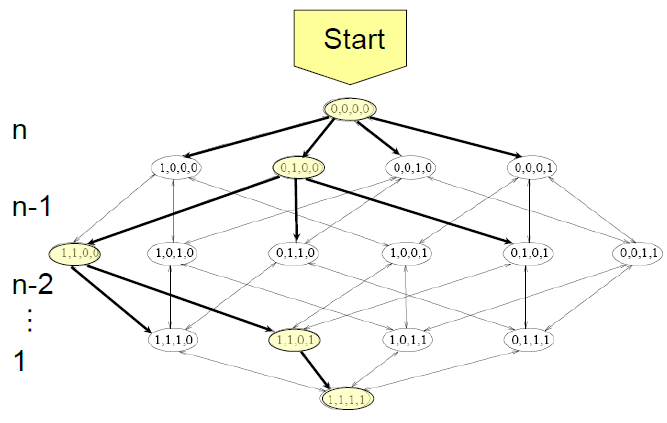

#### Note:

* Both Backward Feature Elimination and Forward Feature Selection are time consuming and computationally expensive.
* They are used on datasets that have a small number of input variables.

### 6. Principal Component Analysis (PCA)

* The most popular technique when we think of dimension reduction
* The idea is to reduce the dimensionality of a dataset consisting of a large number of related variables while retaining as much variance in the data as possible, i.e., features are fewer but still can explain the variance of the target.

#### How does PCA work?

* PCA finds a set of new variables that the original variables are just their linear combinations. 
* The new variables are called Principal Components (PCs). 
* These principal components are orthogonal, i.e., they explain the variance from different angle. 

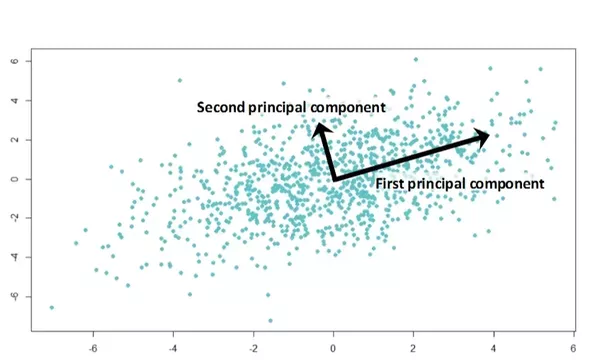

* In a 3-D case, the principal components are perpendicular to each other. X can not be represented by Y or Y cannot be presented by Z.

In [18]:
from IPython.display import HTML
HTML('<img src="pca.gif">')

#### Use the iris dataset to illustrate PCA:

In [19]:
# Using Seaborn library to import Iris dataset
import seaborn as sns

iris = sns.load_dataset('iris')
print("Type", type(iris))

iris.head()

Type <class 'pandas.core.frame.DataFrame'>


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


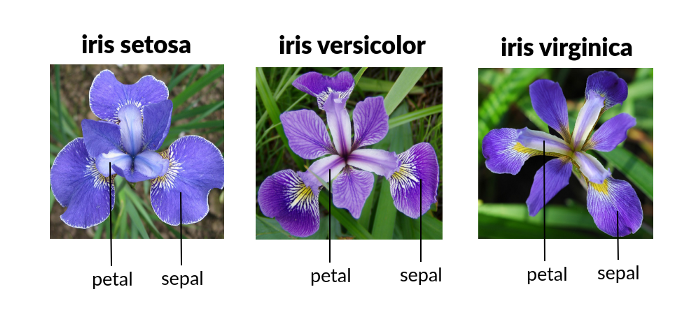

#### In PCA, we only use X variables. We don't use the target Y variable. In this case Y is species and X is the first 4 columns.

#### Standardization

* All the variables should be on the same scale before applying PCA, otherwise, a feature with large values will dominate the result. 
* Below I use StandardScaler in scikit-learn to standardize the dataset’s features onto the unit scale (mean = 0 and variance = 1).

In [20]:
from sklearn.preprocessing import StandardScaler
variables = ['sepal_length','sepal_width','petal_length', 'petal_width']
x = iris.loc[:, variables].values
y = iris.loc[:,['species']].values
x = StandardScaler().fit_transform(x)
x = pd.DataFrame(x)
x

,0,1,2,3
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444
...,...,...,...,...
145,1.038005,-0.131979,0.819596,1.448832
146,0.553333,-1.282963,0.705921,0.922303
147,0.795669,-0.131979,0.819596,1.053935
148,0.432165,0.788808,0.933271,1.448832


* There are four features in the original data. So PCA will provide the same number of principal components.
* Because PCA is the rotated coordinate system so it will have the same number principal components as original features

In [21]:
from sklearn.decomposition import PCA
pca = PCA()
x_pca = pca.fit_transform(x)
x_pca = pd.DataFrame(x_pca)
x_pca.head()

,0,1,2,3
0,-2.264703,0.480027,-0.127706,-0.024168
1,-2.080961,-0.674134,-0.234609,-0.103007
2,-2.364229,-0.341908,0.044201,-0.028377
3,-2.299384,-0.597395,0.091290,0.065956
4,-2.389842,0.646835,0.015738,0.035923


#### How much variance does each of principal components explain?

In [22]:
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.72962445, 0.22850762, 0.03668922, 0.00517871])

* It shows the first principal component accounts for 73% variance
* The second, third and fourth account for 23%, 3.7%, and 0.5% variance respectively.

### Choosing the number of components

A vital part of using PCA in practice is the ability to estimate how many components are needed to describe the data.
This can be determined by looking at the cumulative *explained variance ratio* as a function of the number of components:

#### We can say 73 + 23 = 96% of the information is captured by the first and second principal components. 

* In order to reduce dimensionality, we keep only the significant features and drop the insignificant ones
* A rule of thumb is to keep the top principal components that capture significant variance and ignore the small ones.
* In our example, the 1st and 2nd are good enough to capture variance. The 3nd principal component is nice to include, but the 4th principal component is safe to drop.

In [23]:
np.cumsum(pca.explained_variance_ratio_)

array([0.72962445, 0.95813207, 0.99482129, 1.        ])

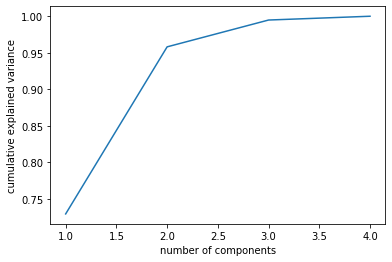

In [24]:
plt.plot([1,2,3,4], np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

#### Let's use only the 1st and 2nd principal components and plot the results. 

In [25]:
x_pca['target']=y
x_pca.columns = ['PC1','PC2','PC3','PC4','target']
x_pca.head()

,PC1,PC2,PC3,PC4,target
0,-2.264703,0.480027,-0.127706,-0.024168,setosa
1,-2.080961,-0.674134,-0.234609,-0.103007,setosa
2,-2.364229,-0.341908,0.044201,-0.028377,setosa
3,-2.299384,-0.597395,0.091290,0.065956,setosa
4,-2.389842,0.646835,0.015738,0.035923,setosa


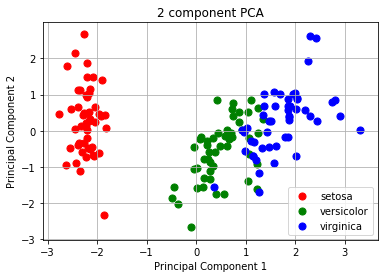

In [26]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1') 
ax.set_ylabel('Principal Component 2') 
ax.set_title('2 component PCA') 
targets = ['setosa','versicolor','virginica']
colors = ['r','g','b']
for target, color in zip(targets,colors):
     indicesToKeep = x_pca['target'] == target
     ax.scatter(x_pca.loc[indicesToKeep,'PC1']
         ,x_pca.loc[indicesToKeep,'PC2']
         ,c = color
         ,s = 50)
ax.legend(targets)
ax.grid()

### 7. Kernel PCA

* PCA Pros

    * PCA is a linear method. 
    * It can only be applied to datasets which are linearly separable. 
    * It does an excellent job for datasets, which are linearly separable.
    
* PCA Cons

    * Might get a result which may not be the optimal dimensionality reduction on non-linear datasets


#### The kernel idea

* Use a kernel function to project dataset into a higher dimensional feature space, where it is linearly separable.
* It is similar to the idea of Support Vector Machines.
* There are various kernel methods like linear, polynomial, and gaussian.

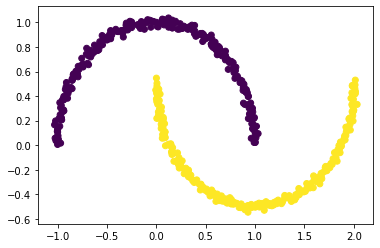

In [27]:
from sklearn.datasets import make_moons 
  
X, y = make_moons(n_samples = 500, noise = 0.02, random_state = 417) 
  
plt.scatter(X[:, 0], X[:, 1], c = y) 
plt.show()

#### Standard PCA won't work well in this case. Two principal components couldn't distinguish the two classes

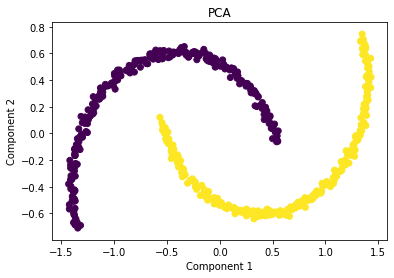

In [28]:
from sklearn.decomposition import PCA 
pca = PCA(n_components = 2) 
X_pca = pca.fit_transform(X) 
   
plt.title("PCA") 
plt.scatter(X_pca[:, 0], X_pca[:, 1], c = y) 
plt.xlabel("Component 1") 
plt.ylabel("Component 2") 
plt.show() 

#### Try kernel PCA with RBF kernel with a gamma value of 15. Now the two classes are linearly separable in the kernel space. 



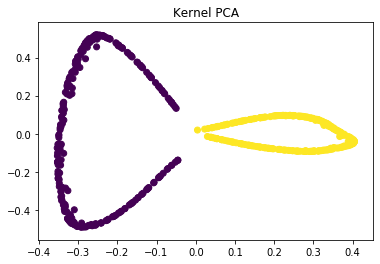

In [29]:
from sklearn.decomposition import KernelPCA 
kpca = KernelPCA(kernel ='rbf', gamma = 15) 
X_kpca = kpca.fit_transform(X) 
  
plt.title("Kernel PCA") 
plt.scatter(X_kpca[:, 0], X_kpca[:, 1], c = y) 
plt.show() 

#### PCA Summary

* Start with PCA on high-dimensional dataset
    * Visualize the relationship between points
    * Understand the main variance in the data
    * Understand the intrinsic dimensionality
    * A straightforward and efficient path to gaining insight into high-dimensional data.

* PCA's main weakness
    * Highly affected by outliers in the data.
    * For this reason, many robust variants of PCA have been developed, many of which act to iteratively discard data points that are poorly described by the initial components.
    * Scikit-Learn contains a couple interesting variants on PCA, including ``RandomizedPCA`` and ``SparsePCA``, both also in the ``sklearn.decomposition`` submodule.


### References

https://www.analyticsvidhya.com/blog/2018/08/dimensionality-reduction-techniques-python/

https://towardsdatascience.com/dimension-reduction-techniques-with-python-f36ca7009e5c

https://en.wikipedia.org/wiki/Kernel_principal_component_analysis

http://fourier.eng.hmc.edu/e161/lectures/kernelPCA/node4.html

https://www.geeksforgeeks.org/ml-introduction-to-kernel-pca/